Nama : Adinda Putri Rachmawati

NPM : 24083010005

Analisis Numerik A

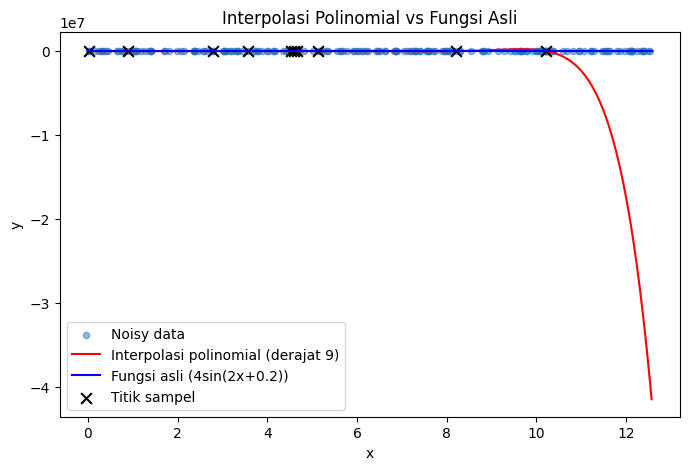

Polinomial hasil interpolasi:
         9         8       7        6             5             4
-0.6673 x + 26.73 x - 448 x + 4097 x - 2.231e+04 x + 7.366e+04 x
              3             2
 - 1.426e+05 x + 1.456e+05 x - 5.834e+04 x + 1515


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Data
n = 200
NPM = 5
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)
y_true = 4 * np.sin(2*x + 0.2)
noise = np.random.normal(0, 0.4, n)
y_noisy = y_true + noise

# --- Interpolasi Polinomial ---
# Ambil subset titik biar derajat polinomnya tidak terlalu tinggi
m = 10   # jumlah titik, berarti polinom derajat 9
idx = np.linspace(0, n-1, m, dtype=int)   # ambil titik tersebar
x_sub = x[idx]
y_sub = y_noisy[idx]

# Fit polinomial derajat m-1
coeffs = np.polyfit(x_sub, y_sub, deg=m-1)
p = np.poly1d(coeffs)

# Buat grid untuk plot halus
x_grid = np.linspace(0, 4*np.pi, 500)
y_poly = p(x_grid)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(x, y_noisy, s=20, alpha=0.5, label="Noisy data")
plt.plot(x_grid, y_poly, label=f"Interpolasi polinomial (derajat {m-1})", color="red")
plt.plot(x_grid, 4*np.sin(2*x_grid+0.2), label="Fungsi asli (4sin(2x+0.2))", color="blue")
plt.scatter(x_sub, y_sub, color="black", marker="x", s=60, label="Titik sampel")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Interpolasi Polinomial vs Fungsi Asli")
plt.show()

# Cetak polinomial
print("Polinomial hasil interpolasi:")
print(p)

# Penjelasan Hasil Interpolasi Polinomial

Pada grafik terlihat perbandingan antara data noisy, fungsi asli, dan hasil interpolasi polinomial derajat 9
1. **Data Noisy (titik biru)**

Data ini merupakan hasil pengambilan sampel dari fungsi asli y=4sin(2x+0.2) yzng kemudian ditambahkan noise atau gangguan. Oleh karena itu, titik-titik data tidak sepenuhnya berada pada kurva fungsi asli.

2. **Titik Sampel (tanda silang hitam)**

Titik-titik ini dipilih untuk membentuk polinomial interpolasi. Sesuai sifat interpolasi, kurva polinomial wajib melewati semua titik ini.

3. Fungsi Asli (garis merah)

Garis merah menunjukkan bentuk fungsi sinus sebenarnya tanpa gangguan. Ini digunakan sebagai pembanding.

4. **Interpolasi Polinomial Derajat 9 (garis biru)**

Garis biru adalah hasil interpolasi polinomial. Terlihat bahwa polinomial mampu melewati seluruh titik sampel dengan tepat, sebagaimana yang diharapkan dari metode interpolasi. Namun, terdapat beberapa hal yang perlu diperhatikan:

- Di sekitar titik sampel, hasil interpolasi cukup mendekati fungsi asli.

- Pada bagian antar titik, kurva interpolasi terkadang menyimpang dari fungsi asli akibat adanya overfitting.

- Pada daerah luar titik sampel, polinomial menunjukkan perilaku yang menyimpang sangat jauh dari fungsi asli. Fenomena ini dikenal sebagai Runge’s Phenomenon, yang umum terjadi pada interpolasi polinomial berderajat tinggi.

**Kesimpulan**

Interpolasi polinomial derajat tinggi memang dapat menghasilkan kurva yang melalui semua titik data, tetapi tidak selalu memberikan representasi yang akurat terhadap fungsi asli, terutama pada bagian luar rentang data. Hal ini menunjukkan bahwa meskipun interpolasi polinomial berguna untuk mendekati fungsi berdasarkan sampel, penggunaannya perlu disesuaikan dengan konteks agar tidak menimbulkan kesalahan estimasi yang signifikan.

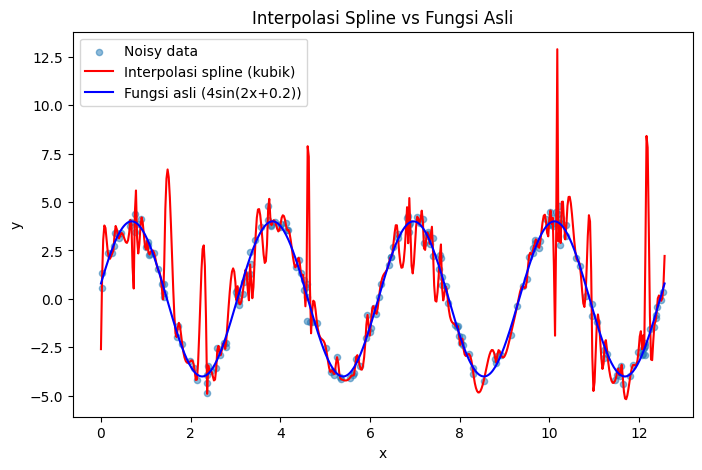

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Data
n = 200
NPM = 5
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)
y_true = 4 * np.sin(2*x + 0.2)
noise = np.random.normal(0, 0.4, n)
y_noisy = y_true + noise

# --- Interpolasi Spline ---
# Supaya spline rapi, kita urutkan data berdasarkan x
x_sorted = np.sort(x)
y_sorted = y_noisy[np.argsort(x)]

# Buat spline (cubic spline = derajat 3)
spline = make_interp_spline(x_sorted, y_sorted, k=3)

# Grid halus untuk plot
x_grid = np.linspace(0, 4*np.pi, 500)
y_spline = spline(x_grid)

# Plot hasil
plt.figure(figsize=(8,5))
plt.scatter(x, y_noisy, s=20, alpha=0.5, label="Noisy data")
plt.plot(x_grid, y_spline, color="red", label="Interpolasi spline (kubik)")
plt.plot(x_grid, 4*np.sin(2*x_grid + 0.2), color="blue", label="Fungsi asli (4sin(2x+0.2))")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Interpolasi Spline vs Fungsi Asli")
plt.show()


# Hasil Interpolasi Spline Kubik

Pada grafik terlihat perbandingan antara data noisy, fungsi asli, dan hasil interpolasi spline kubik.

1. **Data Noisy (titik biru)**

Data ini merupakan hasil pengambilan sampel dari fungsi asli y=4sin(2x+0.2) yzng kemudian ditambahkan noise atau gangguan.

2. **Fungsi asli (garis biru)**

Garis ini adalah bentuk ideal fungsi sinus yang menjadi acuan.

3. **Interpolasi spline kubik (garis merah)**

Spline kubik berusaha menghubungkan titik-titik data dengan kurva halus pada setiap interval. Hasilnya:

- Secara umum, spline mengikuti pola fungsi asli lebih baik dibanding polinomial derajat tinggi.

- Di sekitar titik sampel, kurva spline cukup mendekati fungsi sinus.

- Namun, karena noise yang cukup besar, spline jadi “ikut” pada nilai-nilai ekstrim, sehingga tampak ada lonjakan tajam pada beberapa bagian.

**Kesimpulan**

Interpolasi spline kubik lebih stabil dibanding polinomial derajat tinggi (tidak terlalu melenceng di luar data). Akan tetapi, ketika data mengandung noise, spline cenderung sensitif dan menghasilkan kurva dengan lonjakan tidak wajar. Oleh karena itu, spline lebih cocok digunakan pada data yang relatif halus atau ketika dilakukan praproses (misalnya pengurangan noise).